In [174]:
import pandas as pd

file_path = 'ICU_filtered.csv'
df = pd.read_csv(file_path)

df.head()

,recordid,Length_of_stay,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,GCS_first,Glucose_first,HR_first,MAP_first,NIDiasABP_first,NIMAP_first,NISysABP_first,Temp_first,BUN_first,Creatinine_first,FiO2_first,HCO3_first,HCT_first,K_first,Lactate_first,Mg_first,Na_first,PaCO2_first,PaO2_first,Platelets_first,SysABP_first,WBC_first,pH_first,MechVent,UrineOutputSum
0,132539,5,0,54,0.0,NaN,NaN,0,0,1,NaN,15.0,205.0,73.0,NaN,65.0,92.33,147.0,35.1,13.0,0.8,NaN,26.0,33.7,4.4,NaN,1.5,137.0,NaN,NaN,221.0,NaN,11.2,NaN,0,NaN
1,132540,8,0,76,1.0,175.3,80.6,0,1,0,67.0,3.0,105.0,88.0,79.0,38.0,49.33,72.0,35.2,16.0,0.8,1.0,21.0,24.7,4.3,NaN,3.1,139.0,34.0,344.0,164.0,105.0,7.4,7.45,1,5.0
2,132541,19,0,44,0.0,NaN,56.7,0,0,0,81.0,7.0,141.0,100.0,107.0,84.0,100.30,133.0,37.8,8.0,0.4,1.0,24.0,28.5,3.3,1.3,1.9,137.0,37.0,65.0,72.0,148.0,4.2,7.51,1,14.0
3,132543,9,0,68,1.0,180.3,84.6,0,0,0,NaN,15.0,129.0,79.0,NaN,63.0,86.67,134.0,36.3,23.0,0.9,NaN,28.0,41.3,4.0,NaN,2.1,140.0,NaN,NaN,391.0,NaN,11.5,NaN,0,NaN
4,132545,4,0,88,0.0,NaN,NaN,0,0,0,NaN,15.0,113.0,93.0,NaN,41.0,75.33,144.0,37.8,45.0,1.0,NaN,18.0,22.6,6.0,NaN,1.5,140.0,NaN,NaN,109.0,NaN,3.8,NaN,0,NaN


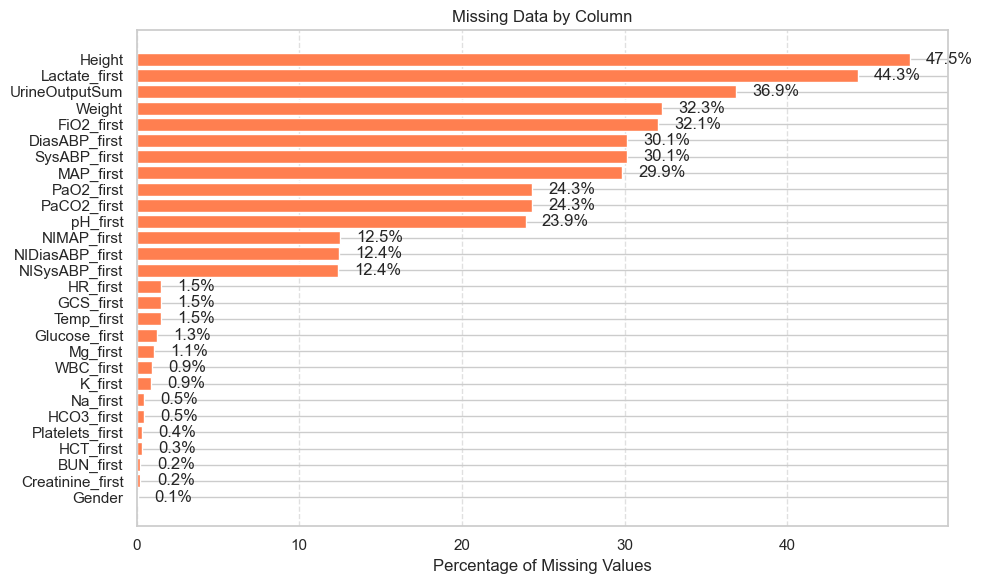

In [175]:
# Calculate the percentage of missing values in a DataFrame

import matplotlib.pyplot as plt

# Calculate percentage of missing values per column
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0]  # Keep only columns with missing data
missing_percent = missing_percent.sort_values()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(missing_percent.index, missing_percent.values, color='coral')
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Data by Column')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add percentage text to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()


In [176]:
# Function to drop columns with a more thga 20 % percentage of missing values

def drop_columns_with_high_missing_values(dataframe, threshold=0.2):
    
    # Calculate the ratio of missing values for each column
    missing_ratio = dataframe.isna().mean()
    
    # Identify columns to drop (those with missing ratio > threshold)
    columns_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()
    
    # Print information about the dropped columns
    if columns_to_drop:
        print(f"Dropping {len(columns_to_drop)} columns with more than {threshold*100}% missing values:")
        for col in columns_to_drop:
            print(f"  - {col}: {missing_ratio[col]*100:.2f}% missing")
    else:
        print(f"No columns with more than {threshold*100}% missing values found.")
    
    # Drop the identified columns and return the resulting DataFrame
    return dataframe.drop(columns=columns_to_drop)

# Apply the function to your DataFrame
df_cleaned = drop_columns_with_high_missing_values(df)

# Display shape before and after

print()
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")


Dropping 11 columns with more than 20.0% missing values:
  - Height: 47.51% missing
  - Weight: 32.30% missing
  - DiasABP_first: 30.14% missing
  - MAP_first: 29.85% missing
  - FiO2_first: 32.07% missing
  - Lactate_first: 44.31% missing
  - PaCO2_first: 24.31% missing
  - PaO2_first: 24.32% missing
  - SysABP_first: 30.13% missing
  - pH_first: 23.90% missing
  - UrineOutputSum: 36.86% missing

Original DataFrame shape: (7886, 36)
Cleaned DataFrame shape: (7886, 25)


In [177]:
df_cleaned.head()

,recordid,Length_of_stay,In-hospital_death,Age,Gender,CCU,CSRU,SICU,GCS_first,Glucose_first,HR_first,NIDiasABP_first,NIMAP_first,NISysABP_first,Temp_first,BUN_first,Creatinine_first,HCO3_first,HCT_first,K_first,Mg_first,Na_first,Platelets_first,WBC_first,MechVent
0,132539,5,0,54,0.0,0,0,1,15.0,205.0,73.0,65.0,92.33,147.0,35.1,13.0,0.8,26.0,33.7,4.4,1.5,137.0,221.0,11.2,0
1,132540,8,0,76,1.0,0,1,0,3.0,105.0,88.0,38.0,49.33,72.0,35.2,16.0,0.8,21.0,24.7,4.3,3.1,139.0,164.0,7.4,1
2,132541,19,0,44,0.0,0,0,0,7.0,141.0,100.0,84.0,100.30,133.0,37.8,8.0,0.4,24.0,28.5,3.3,1.9,137.0,72.0,4.2,1
3,132543,9,0,68,1.0,0,0,0,15.0,129.0,79.0,63.0,86.67,134.0,36.3,23.0,0.9,28.0,41.3,4.0,2.1,140.0,391.0,11.5,0
4,132545,4,0,88,0.0,0,0,0,15.0,113.0,93.0,41.0,75.33,144.0,37.8,45.0,1.0,18.0,22.6,6.0,1.5,140.0,109.0,3.8,0


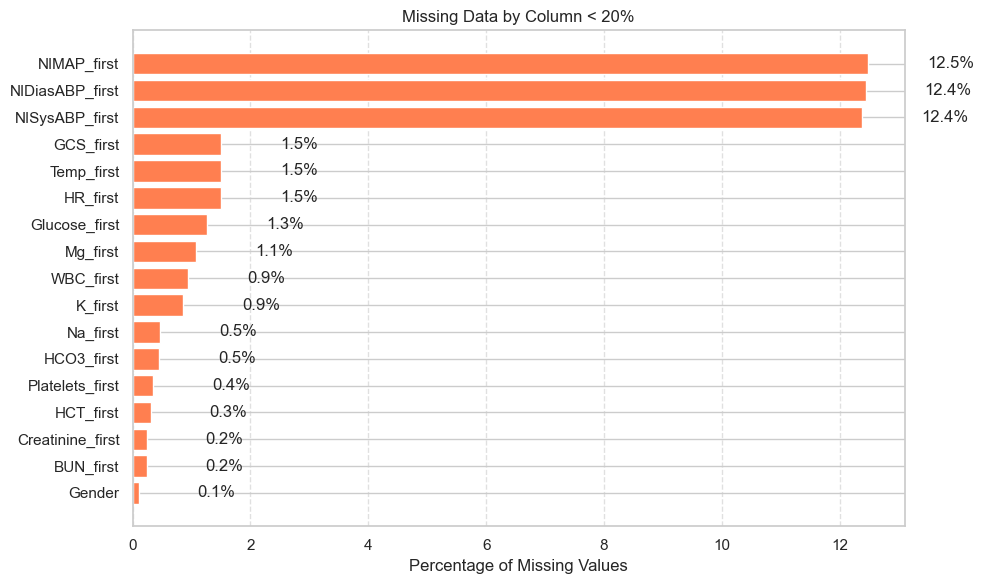

In [178]:
# Calculate the percentage of missing value using plot

import matplotlib.pyplot as plt

# Calculate percentage of missing values per column
missing_percent = df_cleaned.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0]  # Keep only columns with missing data
missing_percent = missing_percent.sort_values()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(missing_percent.index, missing_percent.values, color='coral')
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Data by Column < 20%')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add percentage text to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()


In [179]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, LogisticRegression
import pandas as pd
import numpy as np

# Step 1: Impute numeric columns using BayesianRidge (for continuous features)
numeric_cols = ['GCS_first', 'Glucose_first', 'HR_first', 'Temp_first', 'NISysABP_first',
                'Mg_first', 'Na_first', 'Platelets_first', 'HCO3_first', 'HCT_first', 'K_first', 
                'Creatinine_first', 'WBC_first', 'BUN_first', 'NIDiasABP_first', 'NIMAP_first']

# Create IterativeImputer for numeric columns using BayesianRidge
num_imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)

# Fit and transform numeric columns
df_cleaned[numeric_cols] = num_imputer.fit_transform(df_cleaned[numeric_cols])

# Step 2: Impute the binary 'Gender' column separately using Logistic Regression

# Step 2.1: Filter out rows where 'Gender' is not missing (for training Logistic Regression)
gender_missing_mask = df_cleaned['Gender'].isnull()
known_gender_idx = ~gender_missing_mask
missing_gender_idx = gender_missing_mask

# Features to use for gender prediction - using some of the numeric columns
# Some of these features may have physiological differences between genders
gender_features = ['HR_first', 'HCT_first', 'Creatinine_first', 'WBC_first', 'HCO3_first']

# Step 2.2: Train a Logistic Regression model for Gender imputation
X_known_gender = df_cleaned.loc[known_gender_idx, gender_features]
y_known_gender = df_cleaned.loc[known_gender_idx, 'Gender']

logreg = LogisticRegression(random_state=0)
logreg.fit(X_known_gender, y_known_gender)

# Step 2.3: Impute missing 'Gender' values
X_missing_gender = df_cleaned.loc[missing_gender_idx, gender_features]
if not X_missing_gender.empty:  # Only predict if there are missing values
    imputed_gender = logreg.predict(X_missing_gender)
    
    # Step 2.4: Replace the missing 'Gender' values with the imputed ones
    df_cleaned.loc[missing_gender_idx, 'Gender'] = imputed_gender


# Round the numeric columns to 1 decimal point
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].round(1)

# Display the updated DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_cleaned.head()

c:\Users\rohan\Downloads\AAPS\lab_internal\myenv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,recordid,Length_of_stay,In-hospital_death,Age,Gender,CCU,CSRU,SICU,GCS_first,Glucose_first,HR_first,NIDiasABP_first,NIMAP_first,NISysABP_first,Temp_first,BUN_first,Creatinine_first,HCO3_first,HCT_first,K_first,Mg_first,Na_first,Platelets_first,WBC_first,MechVent
0,132539,5,0,54,0.0,0,0,1,15.0,205.0,73.0,65.0,92.3,147.0,35.1,13.0,0.8,26.0,33.7,4.4,1.5,137.0,221.0,11.2,0
1,132540,8,0,76,1.0,0,1,0,3.0,105.0,88.0,38.0,49.3,72.0,35.2,16.0,0.8,21.0,24.7,4.3,3.1,139.0,164.0,7.4,1
2,132541,19,0,44,0.0,0,0,0,7.0,141.0,100.0,84.0,100.3,133.0,37.8,8.0,0.4,24.0,28.5,3.3,1.9,137.0,72.0,4.2,1
3,132543,9,0,68,1.0,0,0,0,15.0,129.0,79.0,63.0,86.7,134.0,36.3,23.0,0.9,28.0,41.3,4.0,2.1,140.0,391.0,11.5,0
4,132545,4,0,88,0.0,0,0,0,15.0,113.0,93.0,41.0,75.3,144.0,37.8,45.0,1.0,18.0,22.6,6.0,1.5,140.0,109.0,3.8,0


In [180]:
# List of columns to drop

columns_to_drop = ['recordid', 'Length_of_stay', 'In-hospital_death']

# Drop the columns
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

df_cleaned.head()

,Age,Gender,CCU,CSRU,SICU,GCS_first,Glucose_first,HR_first,NIDiasABP_first,NIMAP_first,NISysABP_first,Temp_first,BUN_first,Creatinine_first,HCO3_first,HCT_first,K_first,Mg_first,Na_first,Platelets_first,WBC_first,MechVent
0,54,0.0,0,0,1,15.0,205.0,73.0,65.0,92.3,147.0,35.1,13.0,0.8,26.0,33.7,4.4,1.5,137.0,221.0,11.2,0
1,76,1.0,0,1,0,3.0,105.0,88.0,38.0,49.3,72.0,35.2,16.0,0.8,21.0,24.7,4.3,3.1,139.0,164.0,7.4,1
2,44,0.0,0,0,0,7.0,141.0,100.0,84.0,100.3,133.0,37.8,8.0,0.4,24.0,28.5,3.3,1.9,137.0,72.0,4.2,1
3,68,1.0,0,0,0,15.0,129.0,79.0,63.0,86.7,134.0,36.3,23.0,0.9,28.0,41.3,4.0,2.1,140.0,391.0,11.5,0
4,88,0.0,0,0,0,15.0,113.0,93.0,41.0,75.3,144.0,37.8,45.0,1.0,18.0,22.6,6.0,1.5,140.0,109.0,3.8,0


In [181]:
import numpy as np

# Create ICU column initialized with NaNs
df_cleaned['ICU'] = np.nan

# Assign values based on unit
df_cleaned.loc[df_cleaned['CCU'] == 1, 'ICU'] = 1
df_cleaned.loc[df_cleaned['CSRU'] == 1, 'ICU'] = 2
df_cleaned.loc[df_cleaned['SICU'] == 1, 'ICU'] = 3
df_cleaned.loc[(df_cleaned['CCU'] == 0) & (df_cleaned['CSRU'] == 0) & (df_cleaned['SICU'] == 0), 'ICU'] = 4

# Drop the columns
df_cleaned.drop(columns=['CCU', 'CSRU', 'SICU'], inplace=True)

df_cleaned.head()

,Age,Gender,GCS_first,Glucose_first,HR_first,NIDiasABP_first,NIMAP_first,NISysABP_first,Temp_first,BUN_first,Creatinine_first,HCO3_first,HCT_first,K_first,Mg_first,Na_first,Platelets_first,WBC_first,MechVent,ICU
0,54,0.0,15.0,205.0,73.0,65.0,92.3,147.0,35.1,13.0,0.8,26.0,33.7,4.4,1.5,137.0,221.0,11.2,0,3.0
1,76,1.0,3.0,105.0,88.0,38.0,49.3,72.0,35.2,16.0,0.8,21.0,24.7,4.3,3.1,139.0,164.0,7.4,1,2.0
2,44,0.0,7.0,141.0,100.0,84.0,100.3,133.0,37.8,8.0,0.4,24.0,28.5,3.3,1.9,137.0,72.0,4.2,1,4.0
3,68,1.0,15.0,129.0,79.0,63.0,86.7,134.0,36.3,23.0,0.9,28.0,41.3,4.0,2.1,140.0,391.0,11.5,0,4.0
4,88,0.0,15.0,113.0,93.0,41.0,75.3,144.0,37.8,45.0,1.0,18.0,22.6,6.0,1.5,140.0,109.0,3.8,0,4.0


In [182]:
# Display the DataFrame information

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7886 entries, 0 to 7885
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               7886 non-null   int64  
 1   Gender            7886 non-null   float64
 2   GCS_first         7886 non-null   float64
 3   Glucose_first     7886 non-null   float64
 4   HR_first          7886 non-null   float64
 5   NIDiasABP_first   7886 non-null   float64
 6   NIMAP_first       7886 non-null   float64
 7   NISysABP_first    7886 non-null   float64
 8   Temp_first        7886 non-null   float64
 9   BUN_first         7886 non-null   float64
 10  Creatinine_first  7886 non-null   float64
 11  HCO3_first        7886 non-null   float64
 12  HCT_first         7886 non-null   float64
 13  K_first           7886 non-null   float64
 14  Mg_first          7886 non-null   float64
 15  Na_first          7886 non-null   float64
 16  Platelets_first   7886 non-null   float64


In [183]:
# Diescribe the DataFrame to get an overview of the data

df_cleaned.describe(include='all')

,Age,Gender,GCS_first,Glucose_first,HR_first,NIDiasABP_first,NIMAP_first,NISysABP_first,Temp_first,BUN_first,Creatinine_first,HCO3_first,HCT_first,K_first,Mg_first,Na_first,Platelets_first,WBC_first,MechVent,ICU
count,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.00000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000
mean,64.489095,0.563530,10.088854,148.986685,89.622648,60.272610,79.283312,121.343114,36.560791,25.855085,1.350178,23.18051,31.956036,4.174157,1.930928,138.864012,214.838727,12.957228,0.631372,2.860512
std,17.307736,0.495979,4.864920,74.558938,20.003605,15.919371,16.529121,24.343815,1.049656,21.558858,1.444942,4.69110,5.978776,0.738968,0.516646,4.733536,114.529829,10.135073,0.482463,1.066499
min,15.000000,0.000000,3.000000,8.000000,32.000000,5.900000,18.000000,2.000000,26.100000,0.000000,0.100000,5.00000,5.000000,1.800000,0.000000,98.000000,5.000000,1.000000,0.000000,1.000000
25%,53.000000,0.000000,6.000000,108.000000,76.000000,50.000000,68.300000,105.000000,35.900000,13.000000,0.700000,21.00000,27.900000,3.700000,1.600000,136.000000,141.000000,8.400000,0.000000,2.000000
50%,67.000000,1.000000,11.000000,132.000000,88.000000,59.000000,78.000000,119.700000,36.600000,19.000000,0.900000,23.00000,31.700000,4.100000,1.900000,139.000000,197.000000,11.500000,1.000000,3.000000
75%,78.000000,1.000000,15.000000,166.000000,101.000000,69.000000,88.700000,135.000000,37.200000,30.000000,1.400000,26.00000,36.000000,4.500000,2.200000,141.000000,265.000000,15.600000,1.000000,4.000000
max,90.000000,1.000000,17.300000,1268.000000,216.000000,168.000000,171.000000,252.000000,40.400000,209.000000,22.100000,52.00000,61.800000,19.600000,21.000000,177.000000,2292.000000,528.000000,1.000000,4.000000


In [184]:
# Save the DataFrame as a CSV file

# df_cleaned.to_csv('icu_updated.csv', index=False)

In [185]:
# Standardizing Data

from sklearn.preprocessing import StandardScaler

# Columns to exclude (categorical or target variables)
exclude_cols = ['Gender', 'GCS_first', 'MechVent', 'ICU']

# Select only continuous numeric columns
numeric_cols = [col for col in df_cleaned.columns if col not in exclude_cols]
df_numeric = df_cleaned[numeric_cols]

# Standardize the numeric data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_numeric)

# Convert back to DataFrame for easy handling
df_standardized = pd.DataFrame(standardized_data, columns=numeric_cols)

# Preview
df_standardized.head()


,Age,Glucose_first,HR_first,NIDiasABP_first,NIMAP_first,NISysABP_first,Temp_first,BUN_first,Creatinine_first,HCO3_first,HCT_first,K_first,Mg_first,Na_first,Platelets_first,WBC_first
0,-0.606073,0.751310,-0.831035,0.296977,0.787550,1.054005,-1.391774,-0.596316,-0.380785,0.601068,0.291711,0.305639,-0.834141,-0.393814,0.053800,-0.173392
1,0.665115,-0.589996,-0.081123,-1.399177,-1.814084,-2.027055,-1.296499,-0.457154,-0.380785,-0.464848,-1.213709,0.170307,2.262955,0.028730,-0.443919,-0.548351
2,-1.183886,-0.107126,0.518807,1.490567,1.271575,0.478874,1.180660,-0.828254,-0.657630,0.174701,-0.578087,-1.183017,-0.059867,-0.393814,-1.247254,-0.864107
3,0.202865,-0.268083,-0.531070,0.171336,0.448733,0.519955,-0.248470,-0.132441,-0.311574,1.027434,1.562955,-0.235690,0.327270,0.240002,1.538223,-0.143790
4,1.358491,-0.482692,0.168848,-1.210716,-0.241003,0.930763,1.180660,0.888086,-0.242362,-1.104397,-1.564974,2.470958,-0.834141,0.240002,-0.924174,-0.903576


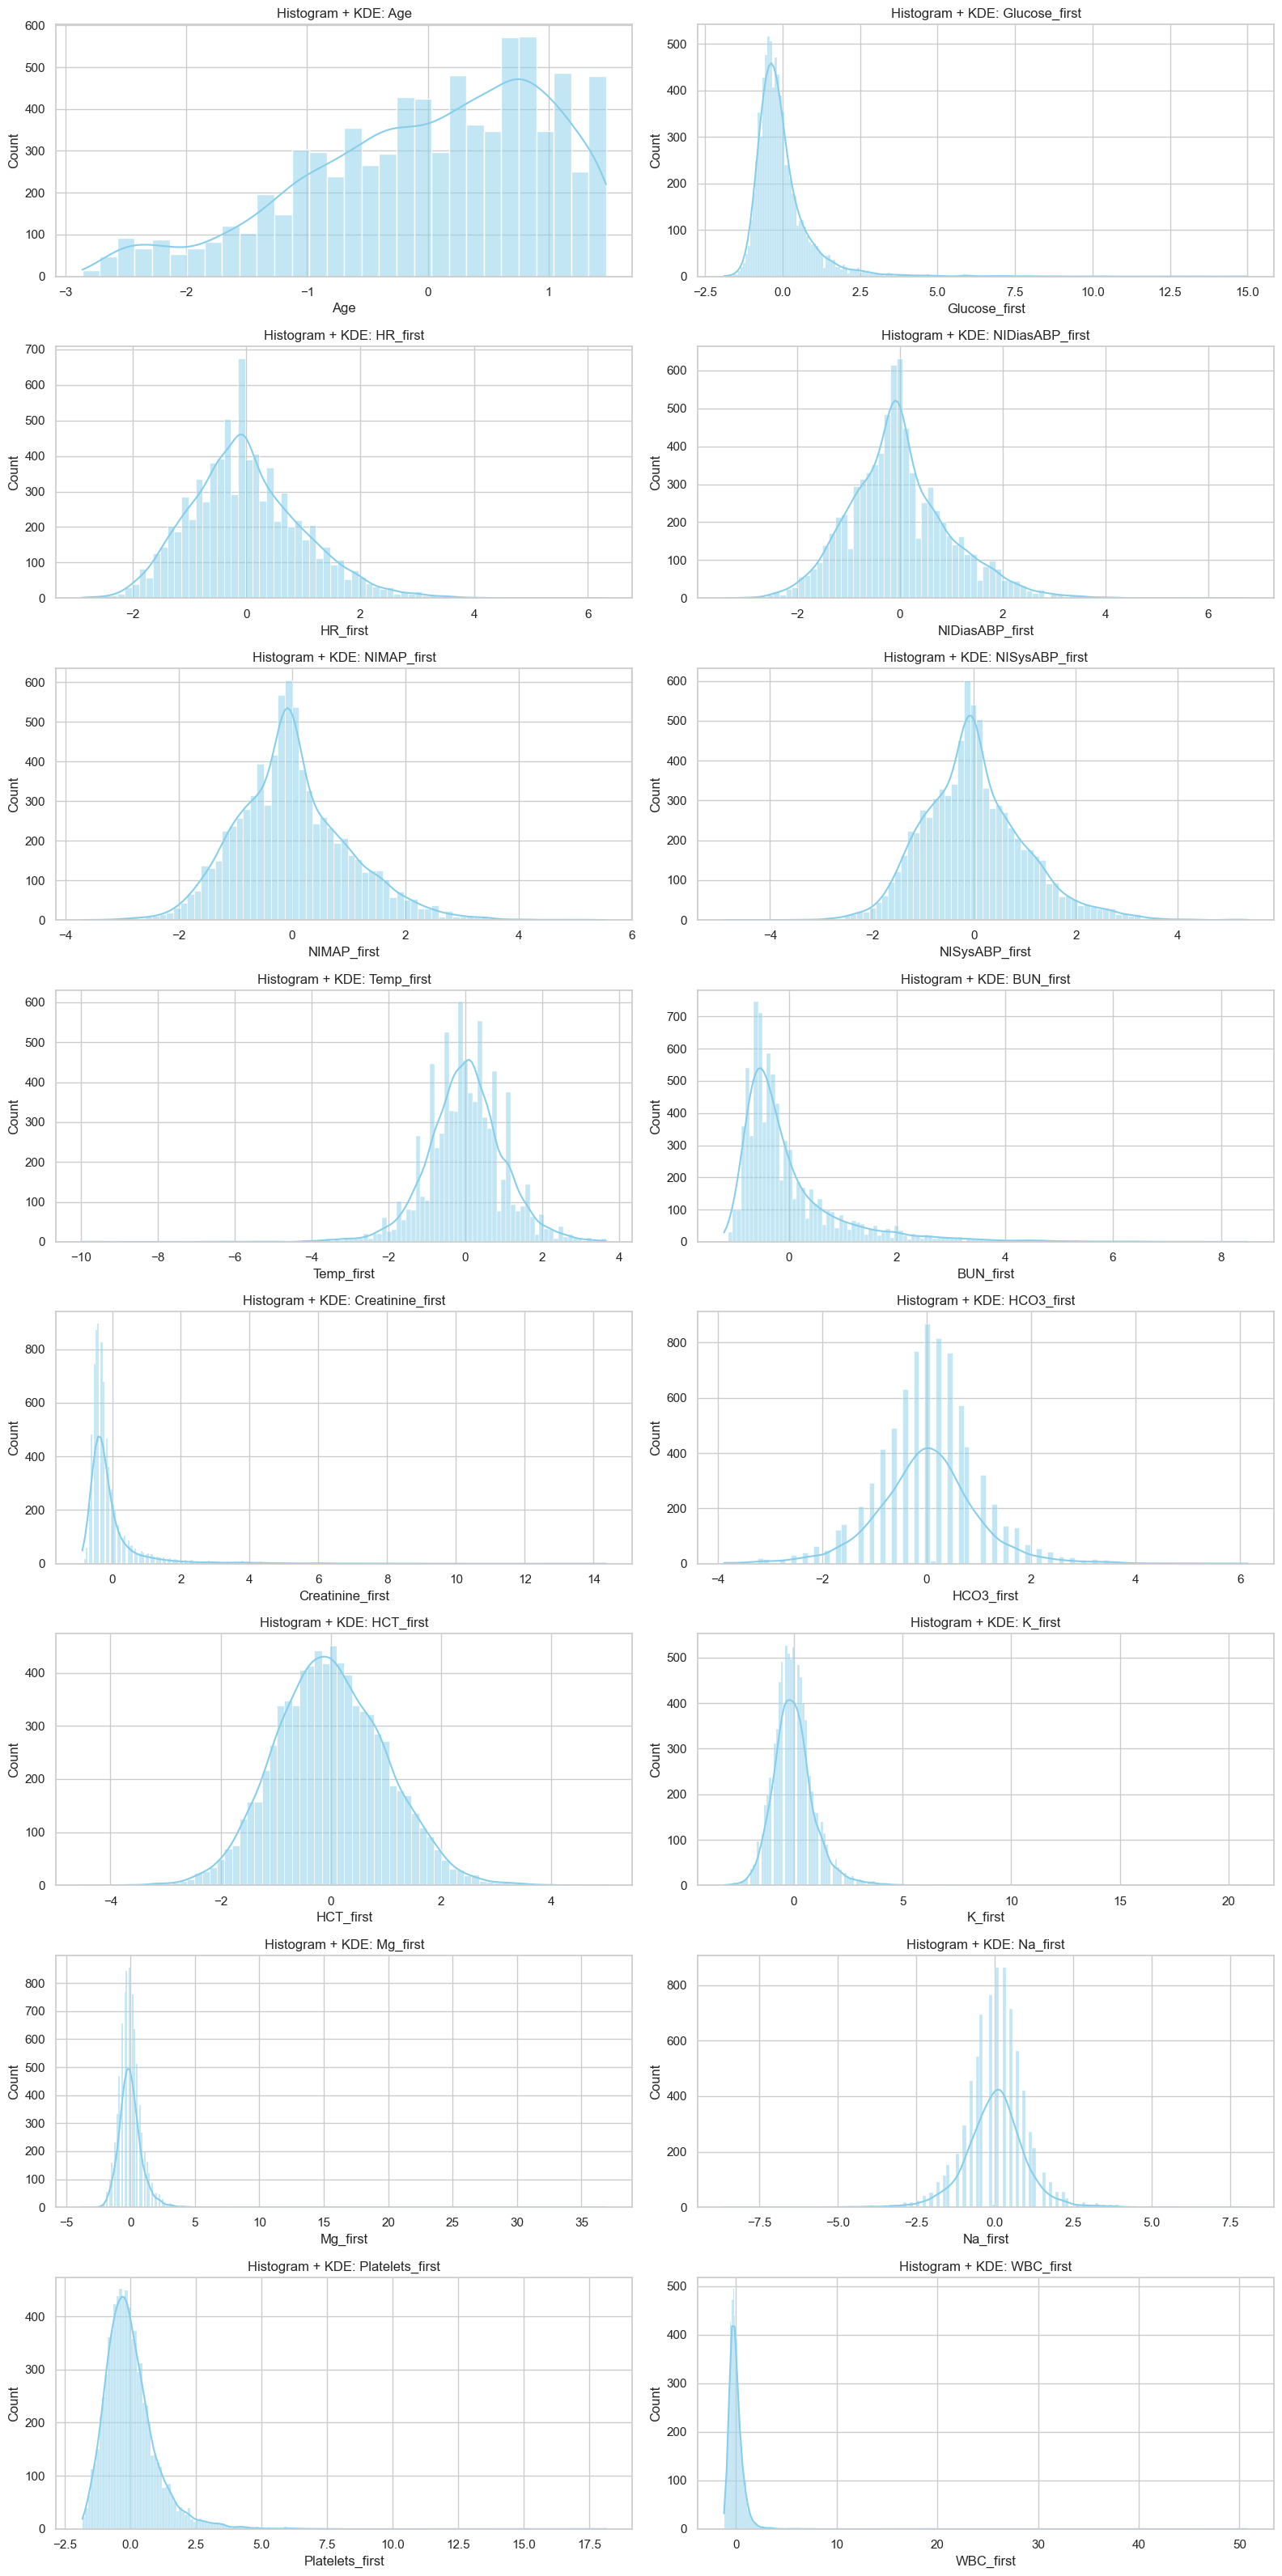

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix
import math

# Drop categorical/label columns
exclude_cols = ['Gender', 'GCS_first', 'MechVent', 'ICU']
numeric_cols = [col for col in df_standardized.columns if col not in exclude_cols]
df_numeric = df_standardized[numeric_cols]

# 1. Histograms & Density Plots
plt.figure(figsize=(16, 4 * math.ceil(len(numeric_cols) / 2)))
for i, col in enumerate(numeric_cols):
    plt.subplot(math.ceil(len(numeric_cols) / 2), 2, i + 1)
    sns.histplot(df_numeric[col], kde=True, color='skyblue')
    plt.title(f'Histogram + KDE: {col}')
plt.tight_layout()
plt.show()


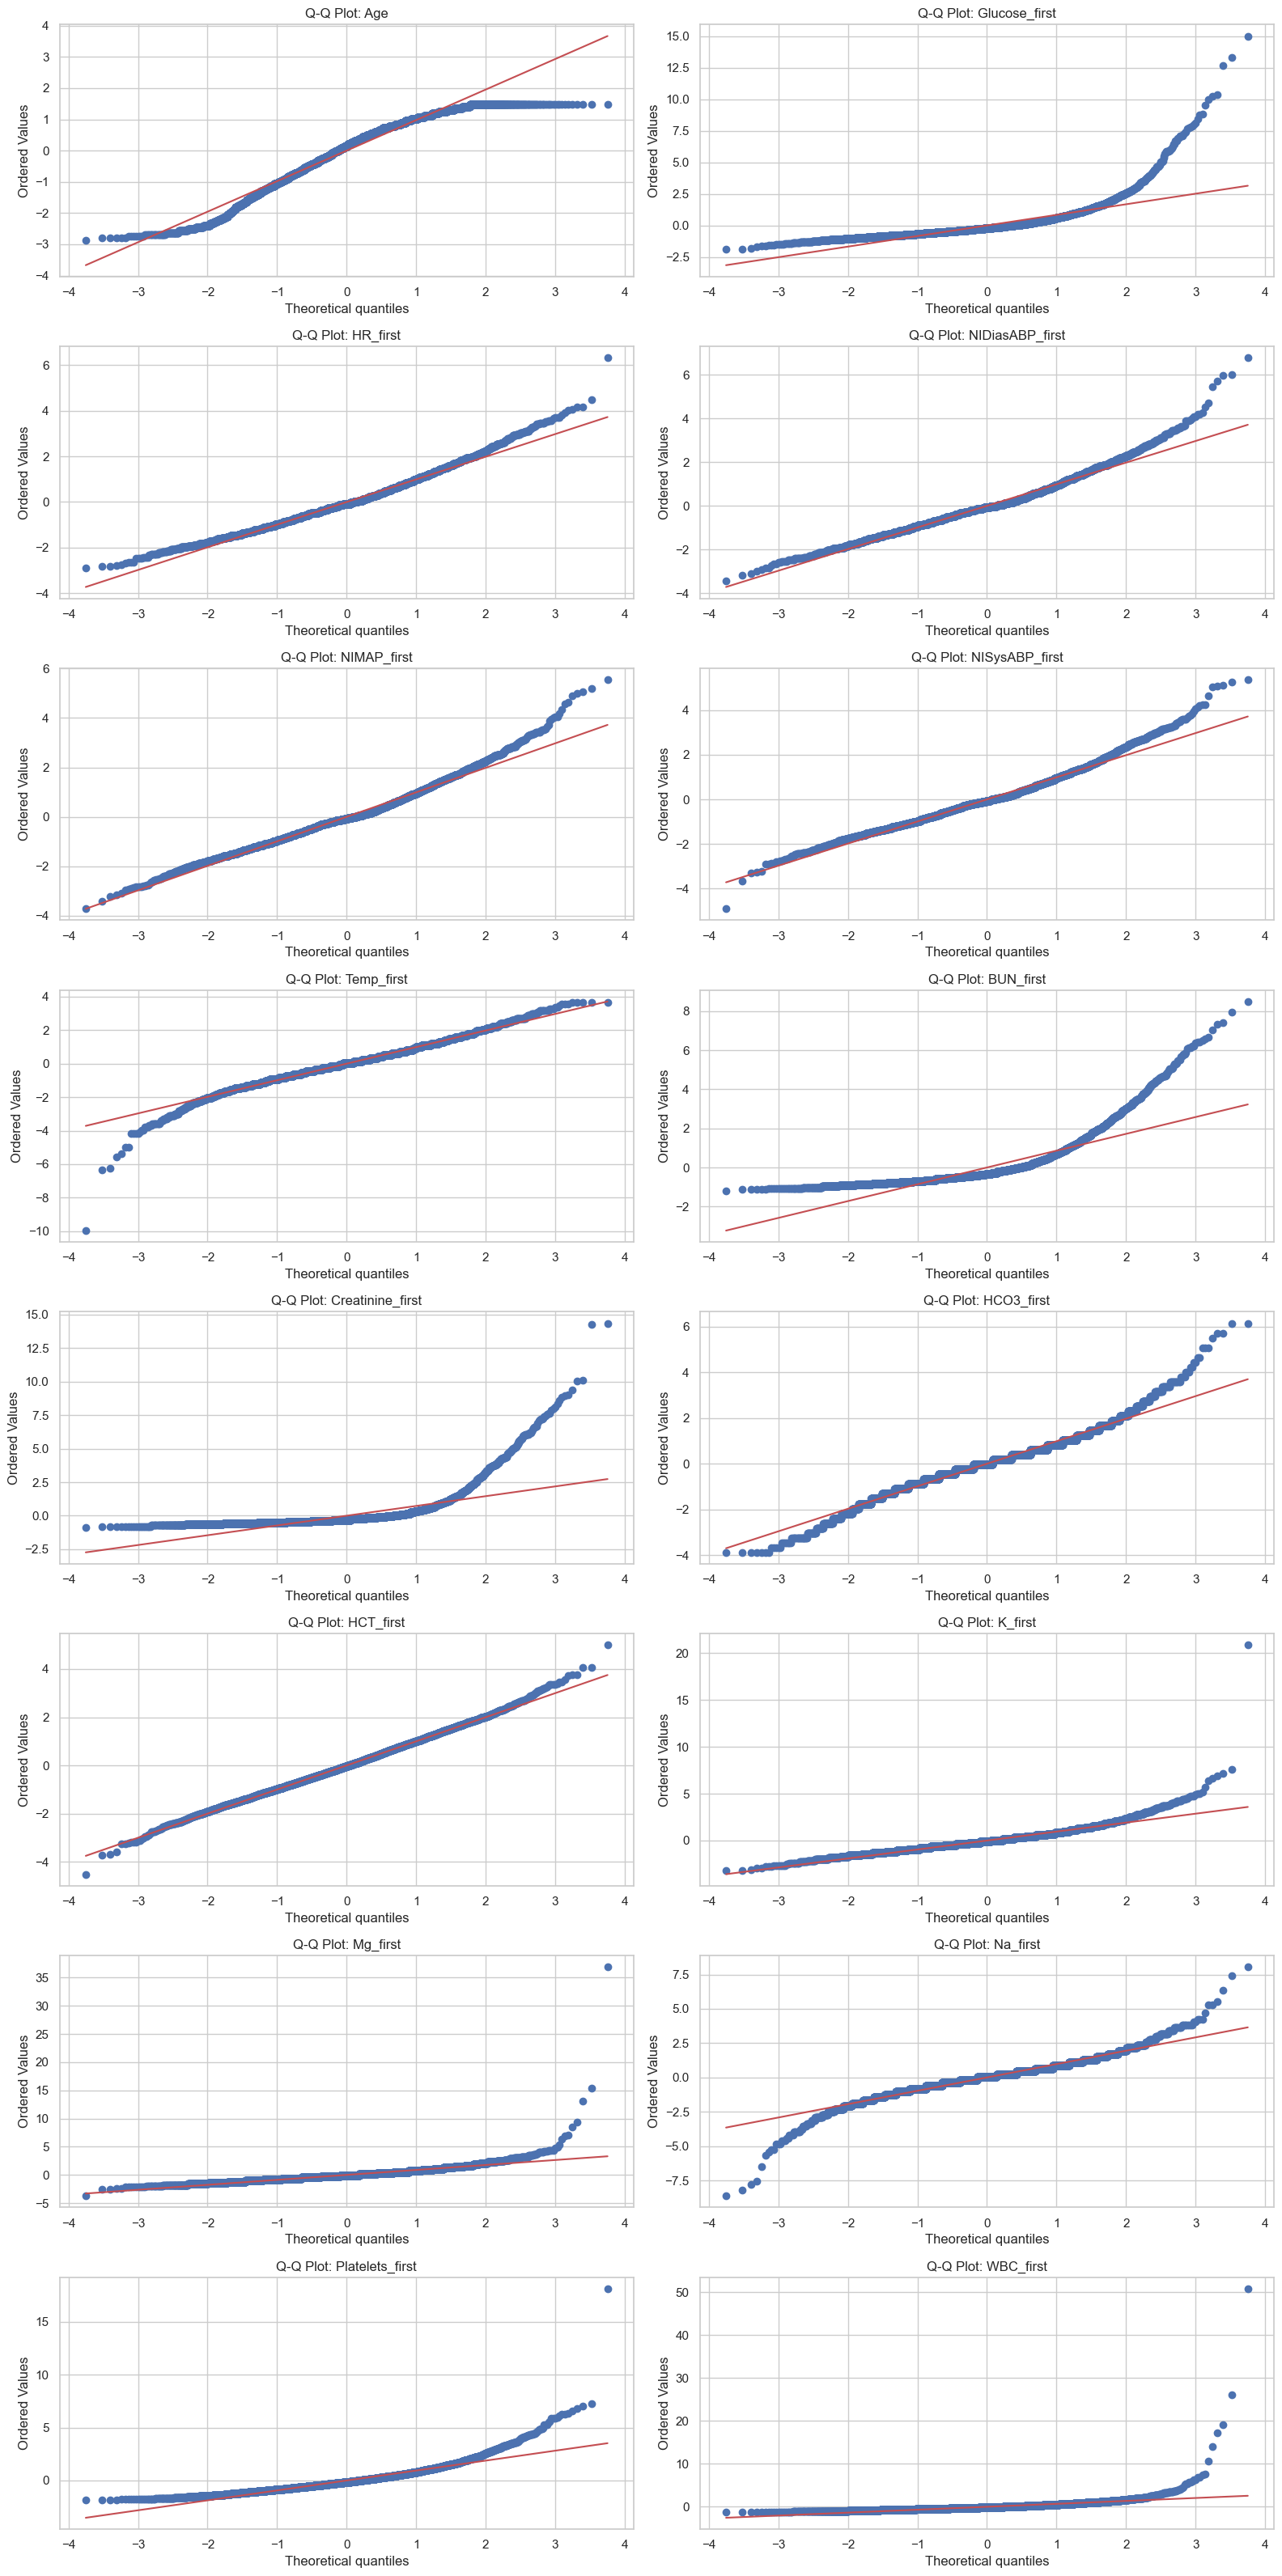

In [187]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# 2. Q-Q Plots
plt.figure(figsize=(16, 4 * math.ceil(len(numeric_cols) / 2)))
for i, col in enumerate(numeric_cols):
    plt.subplot(math.ceil(len(numeric_cols) / 2), 2, i + 1)
    stats.probplot(df_numeric[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {col}')
plt.tight_layout()
plt.show()


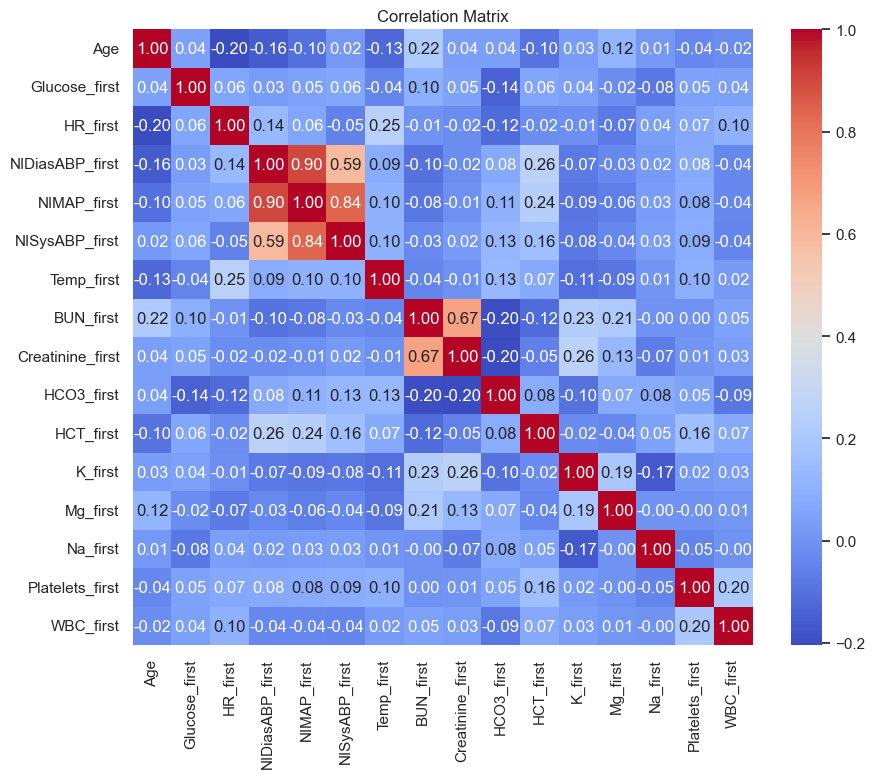

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Display correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df_standardized.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


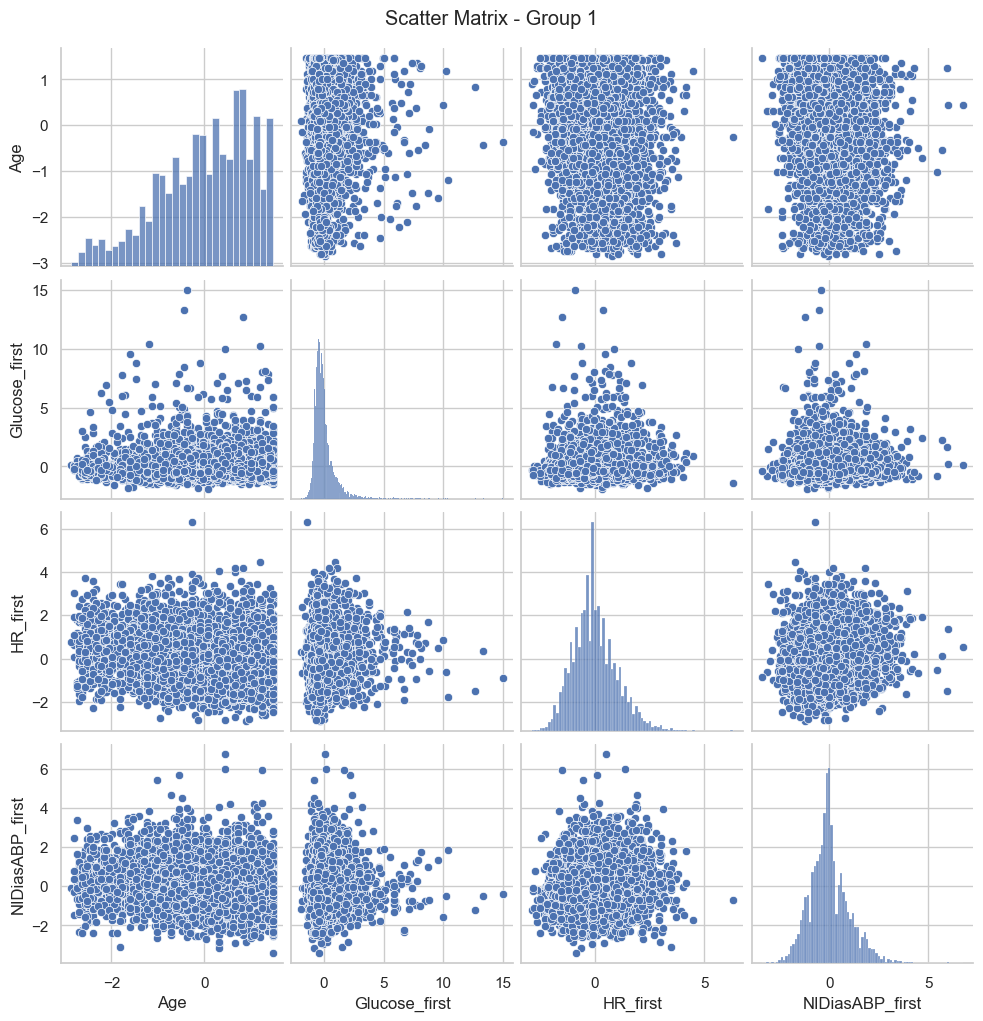

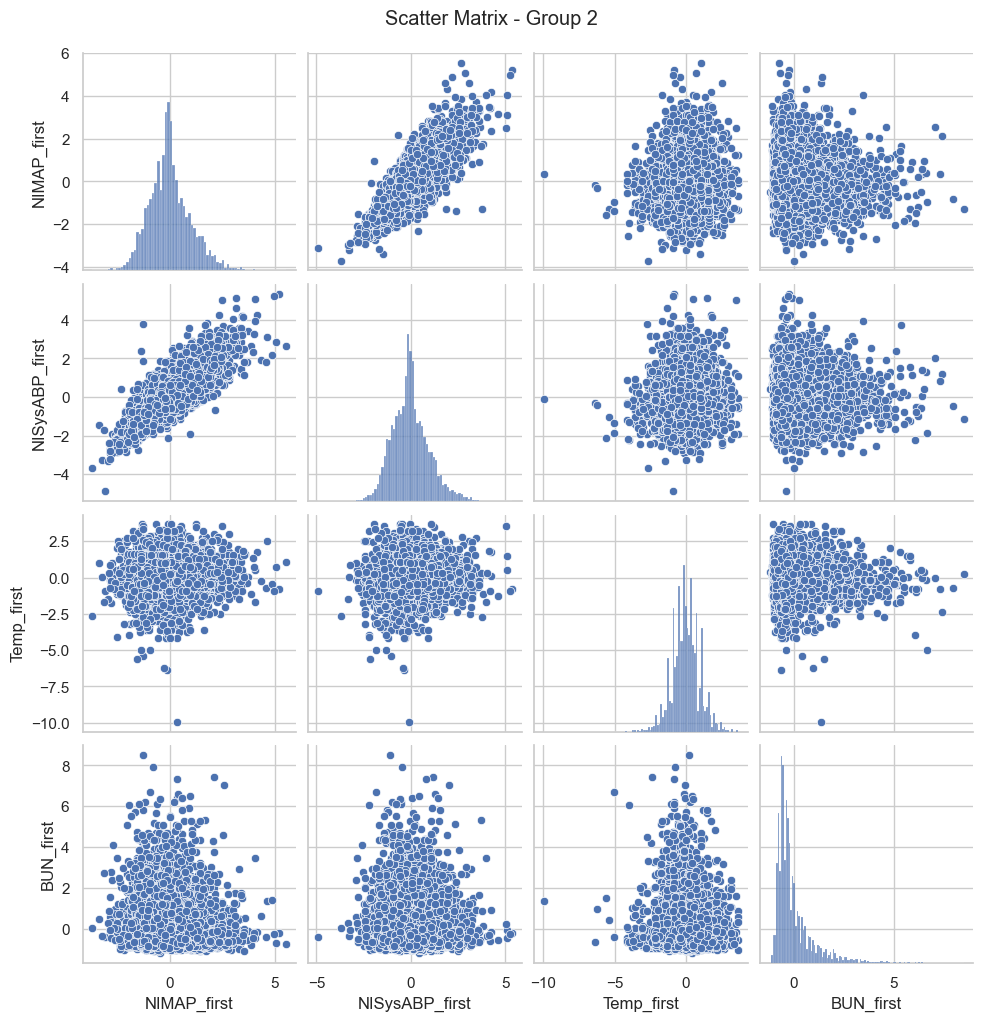

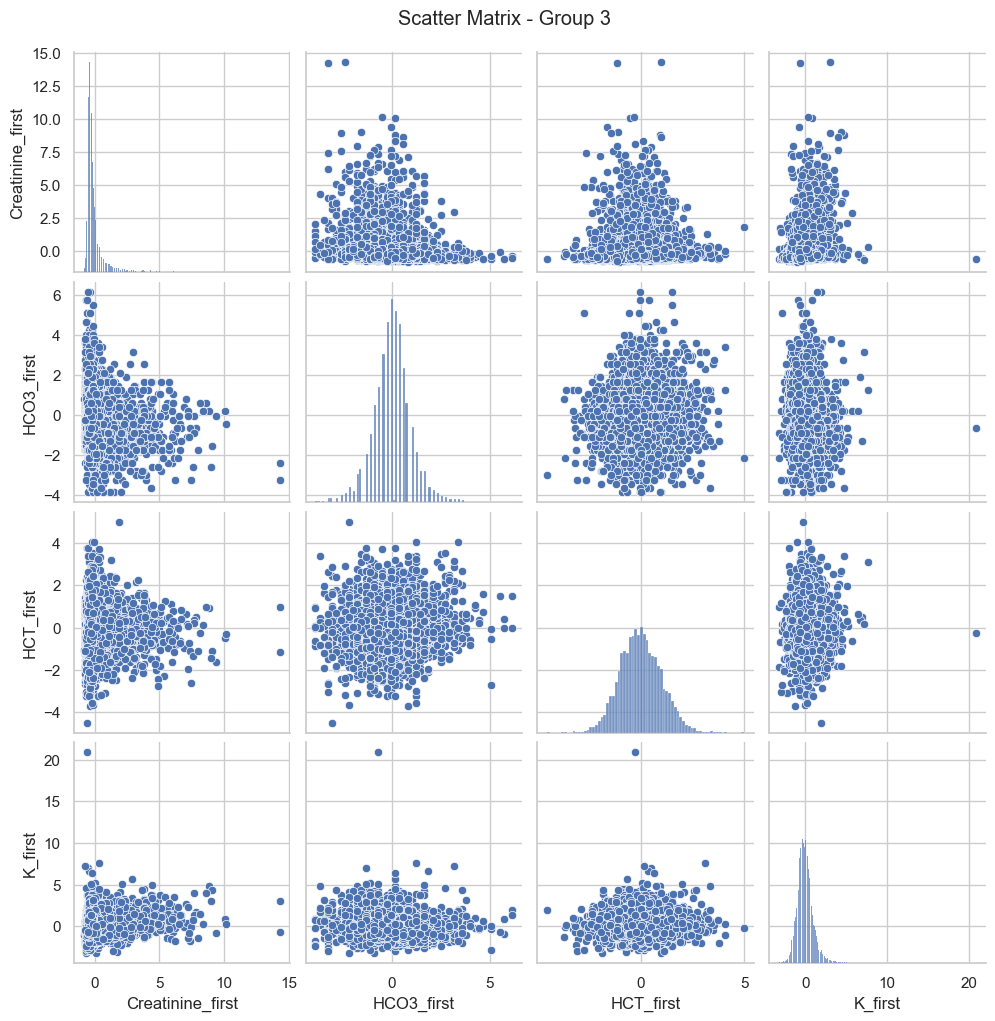

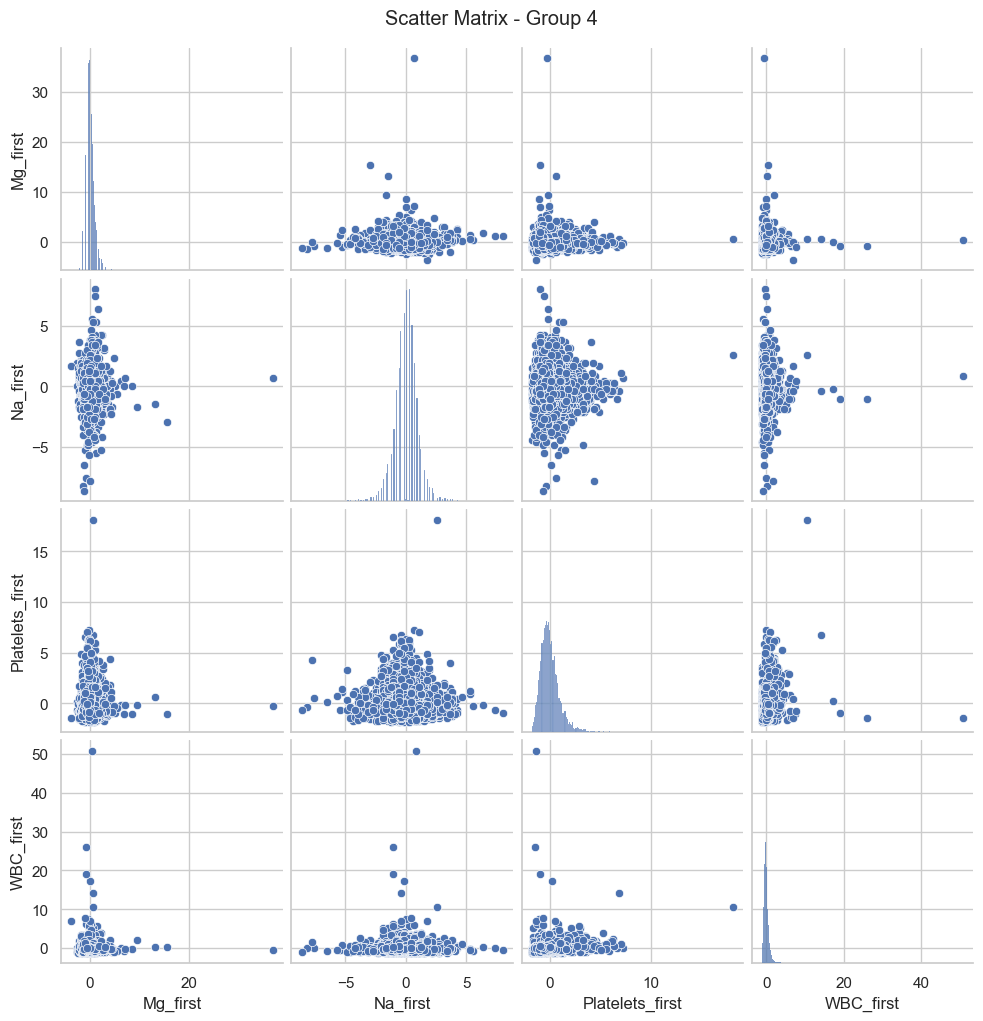

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get only numeric columns from the standardized dataframe
numeric_df = df_standardized.select_dtypes(include=['float64', 'int64'])

# Choose how many features per group (4 or 5 is good for clarity)
group_size = 4

# Break columns into chunks
feature_groups = [numeric_df.columns[i:i+group_size] for i in range(0, len(numeric_df.columns), group_size)]

# Plot each group separately
for idx, group in enumerate(feature_groups):
    sns.pairplot(numeric_df[group])
    plt.suptitle(f'Scatter Matrix - Group {idx + 1}', y=1.02)
    plt.show()


Threshold for anomaly detection: 53.31
Number of anomalies detected: 198
Percentage of anomalies: 2.51%

Top 10 anomalies by Mahalanobis distance:
           Age  Glucose_first  HR_first  NIDiasABP_first  NIMAP_first  \
6759  0.954022       0.617179  0.568801         0.108516     0.327727   
3940  0.318427       0.603766 -0.681053         1.233003    -0.144198   
7533 -2.570638      -0.482692  0.318830         0.862362     1.090066   
6140 -0.028261      -0.616822  1.418702         1.553388     1.755600   
4629 -1.992825      -0.214430  0.418819        -0.456869    -0.864185   
6386 -1.357230      -1.019214  0.168848         0.422618     0.630242   
7003  0.722896      -0.791192  1.318714         2.746978    -1.287707   
3420  0.433990      -0.522931 -0.981018        -0.582510    -0.761330   
6627 -0.374948      15.009391 -0.881029        -0.394049    -0.501166   
924  -1.415012       0.590353 -0.231105        -0.833792    -1.529719   

      NISysABP_first  Temp_first  BUN_first  Crea

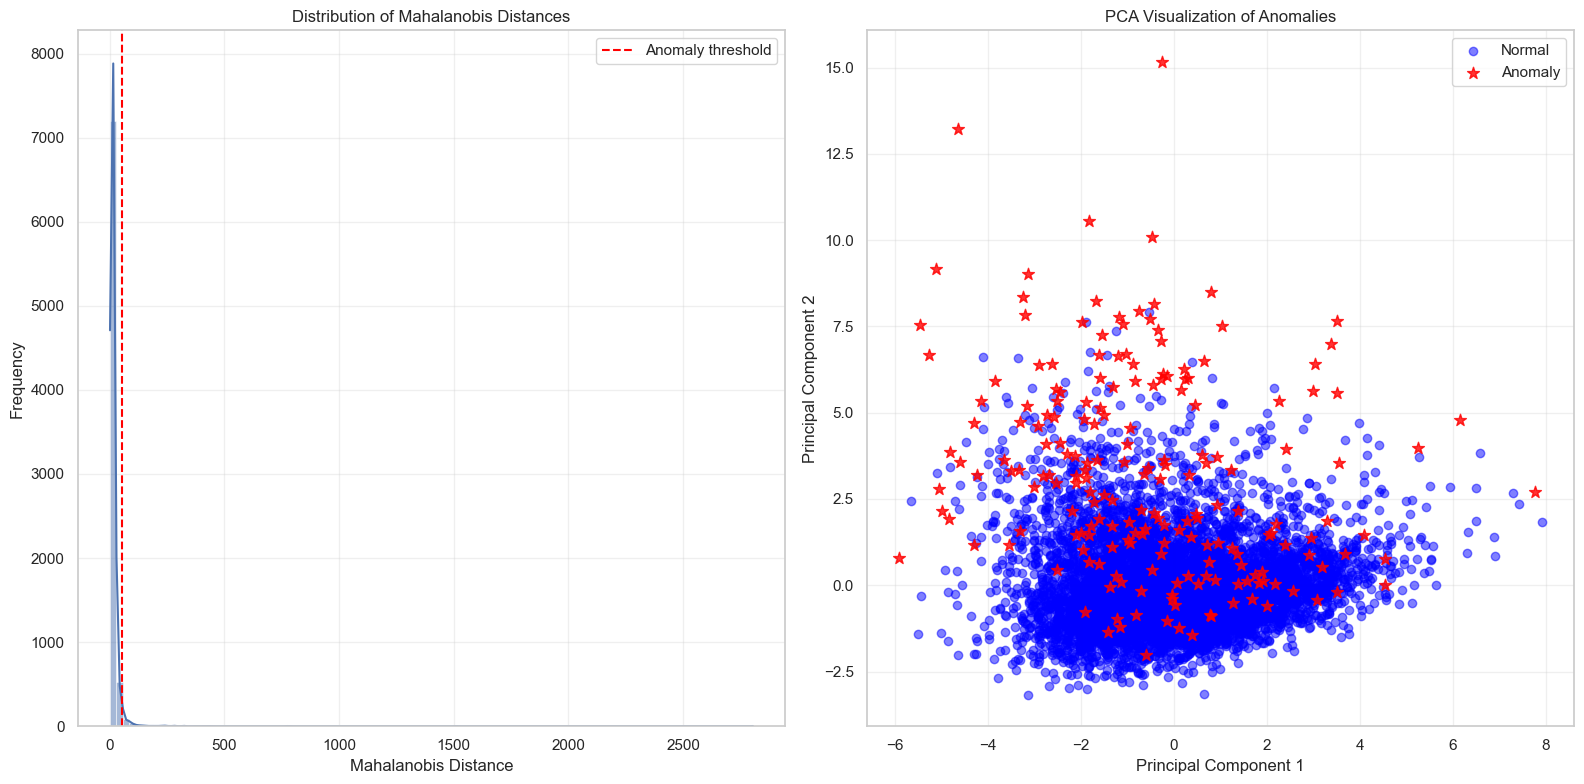

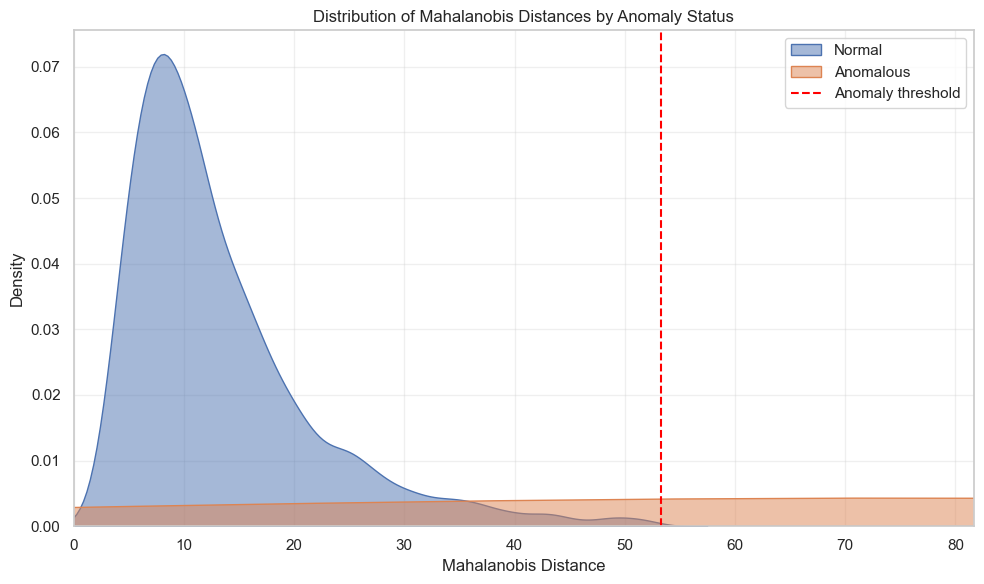


Statistical summary of Mahalanobis distances:
count    7886.000000
mean       15.997971
std        41.328664
min         0.882824
25%         7.499767
50%        11.105242
75%        17.229245
90%        27.173301
95%        37.179945
99%        81.685548
max      2804.580042
Name: mahalanobis_distance, dtype: float64

Number of points exceeding different thresholds:
95th percentile (37.18): 395 points (5.01%)
97.5th percentile (53.31): 198 points (2.51%)
99th percentile (81.69): 79 points (1.00%)
99.5th percentile (105.29): 40 points (0.51%)
99.9th percentile (320.71): 8 points (0.10%)

Detailed Anomaly Report:
      mahalanobis_distance  Age_z_score  Glucose_first_z_score  \
6759           2804.580042     0.954022               0.617179   
3940           1511.619842     0.318427               0.603766   
7533            774.818523    -2.570638              -0.482692   
6140            529.398146    -0.028261              -0.616822   
4629            431.075855    -1.992825          

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# --- Mahalanobis distance function --- #
def calculate_mahalanobis(x, data):
    x_minus_mu = x - np.mean(data, axis=0)
    cov = np.cov(data.T)
    try:
        inv_covmat = np.linalg.inv(cov)
    except np.linalg.LinAlgError:
        inv_covmat = np.linalg.pinv(cov)
    left = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left, x_minus_mu.T)
    return np.diagonal(mahal) if mahal.ndim == 2 else mahal

# --- Anomaly detection --- #
def detect_anomalies(df, threshold_percentile=0.975):
    data = df.values
    mahalanobis_distances = calculate_mahalanobis(data, data)
    df_with_distances = df.copy()
    df_with_distances['mahalanobis_distance'] = mahalanobis_distances
    threshold = np.percentile(mahalanobis_distances, threshold_percentile * 100)
    df_with_distances['is_anomaly'] = df_with_distances['mahalanobis_distance'] > threshold
    print(f"Threshold for anomaly detection: {threshold:.2f}")
    print(f"Number of anomalies detected: {df_with_distances['is_anomaly'].sum()}")
    print(f"Percentage of anomalies: {100 * df_with_distances['is_anomaly'].mean():.2f}%")
    return df_with_distances

# --- Visualization --- #
def plot_improved_visualizations(results, df_standardized, max_percentile=99):
    anomaly_threshold = results.loc[results['is_anomaly'], 'mahalanobis_distance'].min()
    x_max = np.percentile(results['mahalanobis_distance'], max_percentile)
    fig = plt.figure(figsize=(16, 8))

    # Plot 1: Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(results['mahalanobis_distance'], bins=100, kde=True)
    plt.axvline(x=anomaly_threshold, color='red', linestyle='--', label='Anomaly threshold')
    plt.title('Distribution of Mahalanobis Distances')
    plt.xlabel('Mahalanobis Distance')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: PCA visualization
    plt.subplot(1, 2, 2)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_standardized.values)
    normal_points = pca_result[~results['is_anomaly'].values]
    anomaly_points = pca_result[results['is_anomaly'].values]

    plt.scatter(normal_points[:, 0], normal_points[:, 1], c='blue', alpha=0.5, label='Normal')
    plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], c='red', alpha=0.8, s=80, marker='*', label='Anomaly')
    plt.title('PCA Visualization of Anomalies')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # KDE Distribution comparison
    plt.figure(figsize=(10, 6))
    sns.kdeplot(results.loc[~results['is_anomaly'], 'mahalanobis_distance'], label='Normal', fill=True, alpha=0.5)
    sns.kdeplot(results.loc[results['is_anomaly'], 'mahalanobis_distance'], label='Anomalous', fill=True, alpha=0.5)
    plt.axvline(x=anomaly_threshold, color='red', linestyle='--', label='Anomaly threshold')
    plt.xlim(0, x_max)
    plt.title('Distribution of Mahalanobis Distances by Anomaly Status')
    plt.xlabel('Mahalanobis Distance')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# --- Anomaly Report --- #
def create_anomaly_report(df_with_anomalies, original_df=None):
    anomalies = df_with_anomalies[df_with_anomalies['is_anomaly']].copy()
    feature_cols = df_with_anomalies.columns.drop(['mahalanobis_distance', 'is_anomaly'])
    report = pd.DataFrame(index=anomalies.index)
    report['mahalanobis_distance'] = anomalies['mahalanobis_distance']
    for col in feature_cols:
        report[f'{col}_z_score'] = anomalies[col]
    if original_df is not None:
        for col in feature_cols:
            if col in original_df.columns:
                report[f'{col}_original'] = original_df.loc[anomalies.index, col]
    return report.sort_values('mahalanobis_distance', ascending=False)

# --- Statistical Summary --- #
def print_distribution_statistics(results):
    print("\nStatistical summary of Mahalanobis distances:")
    print(results['mahalanobis_distance'].describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
    print("\nNumber of points exceeding different thresholds:")
    for p in [95, 97.5, 99, 99.5, 99.9]:
        threshold = np.percentile(results['mahalanobis_distance'], p)
        count = (results['mahalanobis_distance'] > threshold).sum()
        percent = 100 * count / len(results)
        print(f"{p}th percentile ({threshold:.2f}): {count} points ({percent:.2f}%)")

# --- Main Execution --- #
results = detect_anomalies(df_standardized)

print("\nTop 10 anomalies by Mahalanobis distance:")
top_anomalies = results[results['is_anomaly']].sort_values('mahalanobis_distance', ascending=False).head(10)
print(top_anomalies)

plot_improved_visualizations(results, df_standardized)

print_distribution_statistics(results)

anomaly_report = create_anomaly_report(results, df)
print("\nDetailed Anomaly Report:")
print(anomaly_report.head())

# Optional: Save to CSV
# results.to_csv("anomaly_detection_results.csv", index=False)
# anomaly_report.to_csv("anomaly_report.csv")
